# Cargar Datos

In [29]:
import pandas as pd

In [30]:
df = pd.read_csv('data\CC GENERAL.csv')

# Exploratorio

## Estadisticas 

In [31]:
print("Shape del dataset:", df.shape)
print(df.head())

Shape del dataset: (8950, 18)
  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1     

In [32]:

print("\nValores nulos por columna:")
print(df.isnull().sum())

# Eliminar filas con nulos
df = df.dropna()
print("\nShape después de eliminar nulos:", df.shape)

# Eliminar columna "CUST_ID" (no aporta a clustering)
if "CUST_ID" in df.columns:
    df = df.drop("CUST_ID", axis=1)



Valores nulos por columna:
CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Shape después de eliminar nulos: (8636, 18)


## Graficas 

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

## Matriz de Correlación

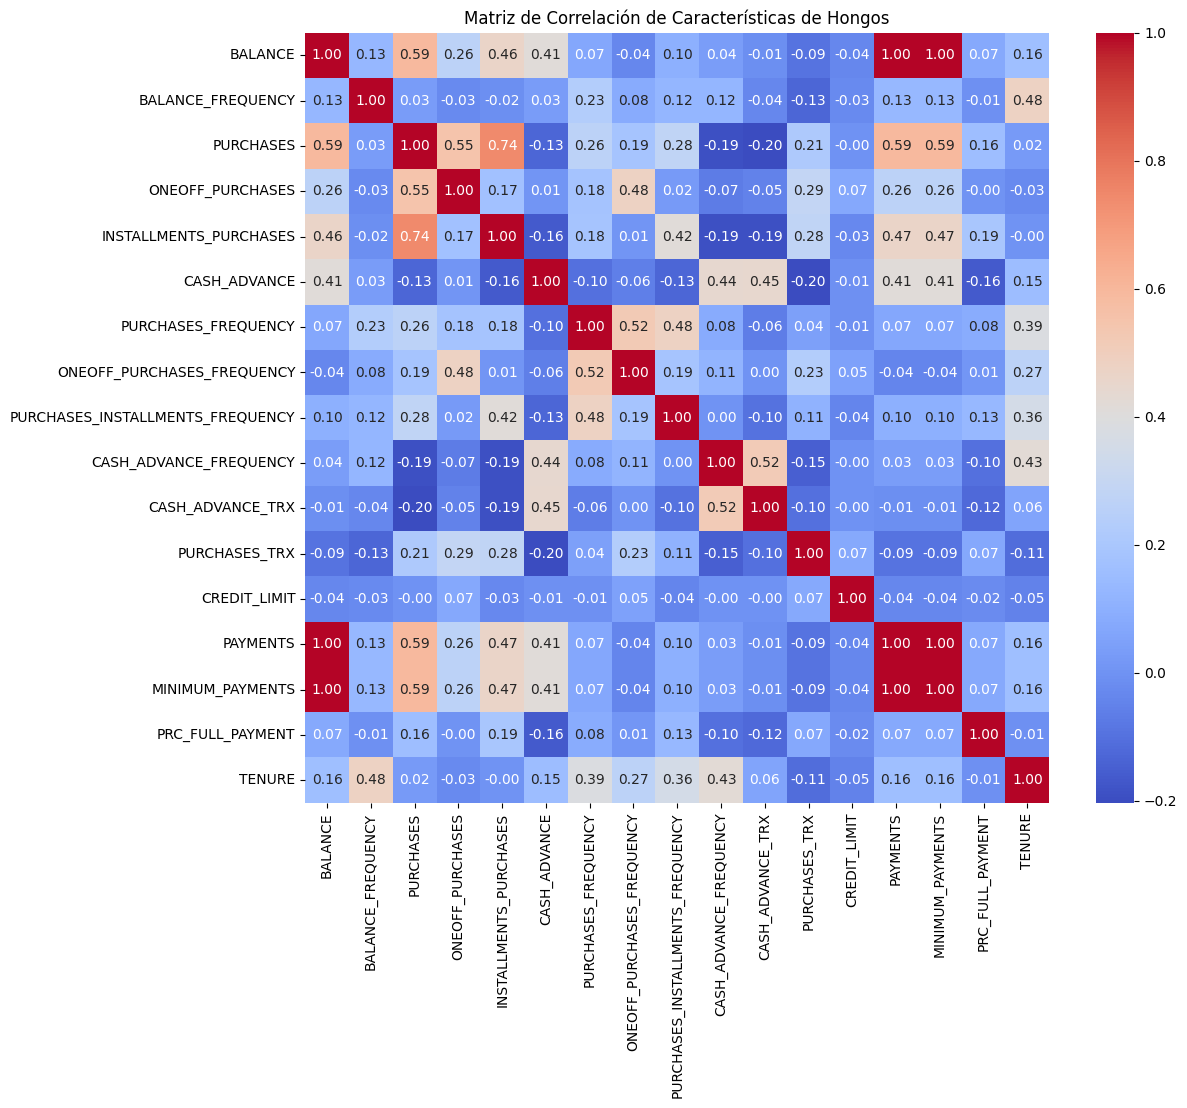

In [34]:
# Diagrama de correlación
plt.figure(figsize=(12, 10))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Matriz de Correlación de Características de Hongos')
plt.show()

## Preparación de Datos

In [35]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [36]:
if "CUST_ID" in df.columns:
    df = df.drop("CUST_ID", axis=1)

In [37]:
# Encodificación de variables categóricas

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Evaluar Numero de Clusters

In [38]:
from sklearn.cluster import KMeans

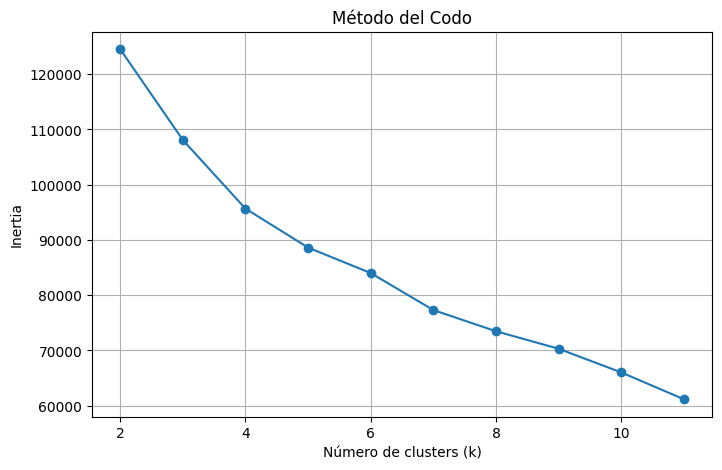

In [39]:
inertias = []
K_range = range(2, 12)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, marker='o')
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inertia")
plt.title("Método del Codo")
plt.grid()
plt.show()

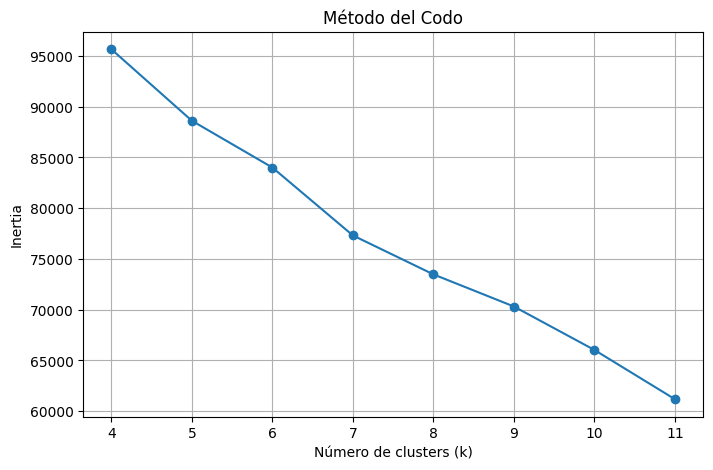

In [40]:
inertias = []
K_range = range(4, 12)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, marker='o')
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inertia")
plt.title("Método del Codo")
plt.grid()
plt.show()

# Entrenamiento con Modelo K-means

In [41]:
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [42]:
k_final = 4

kmeans_final = KMeans(
    n_clusters=k_final,
    random_state=42,
    n_init='auto'
)

labels = kmeans_final.fit_predict(X_scaled)

In [43]:
sil_score = silhouette_score(X_scaled, labels)
print("\n====================================")
print(f"  Coeficiente de Silueta (k={k_final}): {sil_score:.4f}")
print("====================================\n")


  Coeficiente de Silueta (k=4): 0.2005



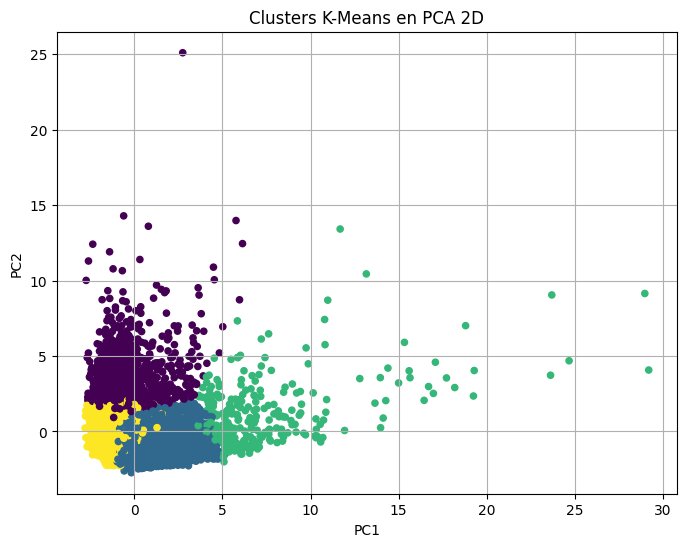

In [44]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap="viridis", s=20)
plt.title("Clusters K-Means en PCA 2D")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid()
plt.show()

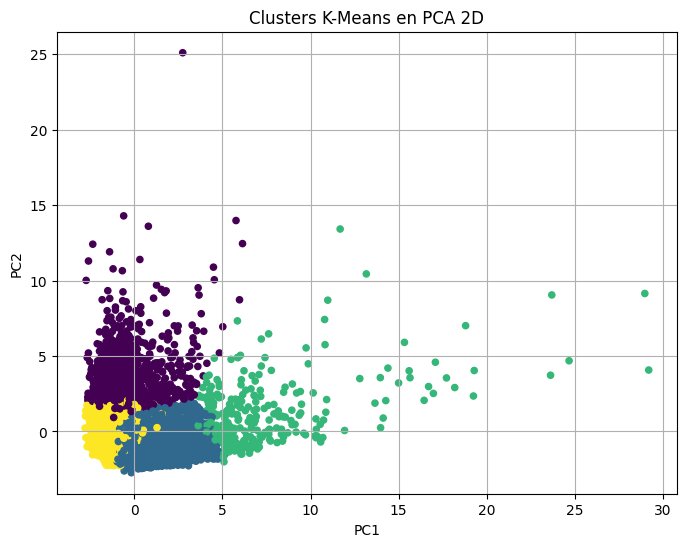

In [45]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap="viridis", s=20)
plt.title("Clusters K-Means en PCA 2D")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid()
plt.show()

In [46]:
df["CLUSTER"] = labels
print(df.head())

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
4   817.714335           1.000000      16.00             16.00   
5  1809.828751           1.000000    1333.28              0.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

In [47]:
cluster_summary = df.groupby("CLUSTER").mean()
print("\n\nResumen promedio por cluster:\n")
print(cluster_summary)



Resumen promedio por cluster:

             BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
CLUSTER                                                                  
0        4652.097509           0.969074   511.046007        324.079611   
1         970.417580           0.950767  1374.131996        687.243458   
2        3941.953414           0.985355  8980.111024       5968.520137   
3        1052.425406           0.818274   277.900840        212.097638   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
CLUSTER                                                              
0                    187.054270   4589.613925             0.290294   
1                    687.076807    223.014367             0.894701   
2                   3013.638669    764.360695             0.945113   
3                     66.154836    597.523951             0.181687   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
CLUSTER                     